In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']

In [52]:
df=pd.read_csv('diabetes.csv', header=None, names=col_names)

In [53]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='label', ylabel='count'>

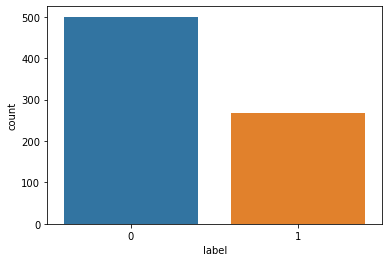

In [56]:
sns.countplot(x ='label', data = df)

In [57]:
df[['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']] = df[['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']].replace(0,np.NaN)


<AxesSubplot:>

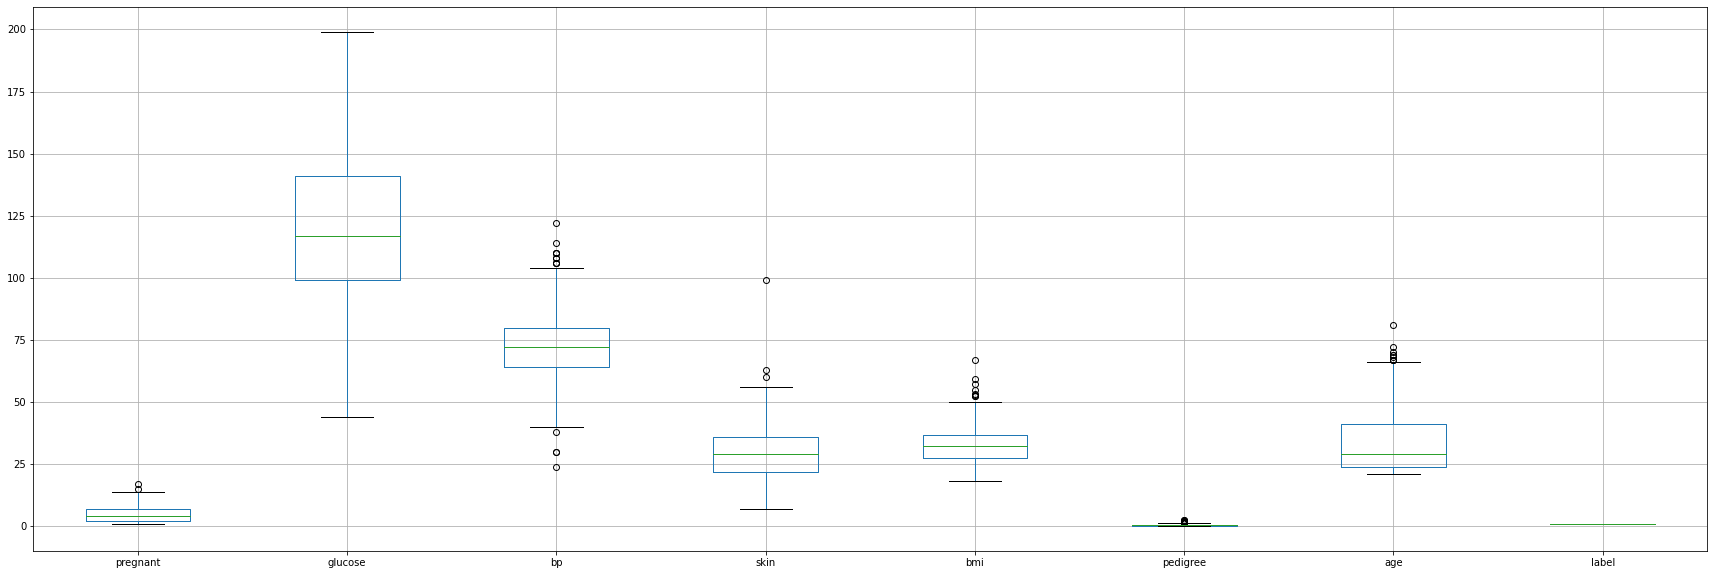

In [58]:
df[['pregnant', 'glucose', 'bp', 'skin', 'bmi', 'pedigree', 'age','label']].boxplot(figsize=(30,10))

array([[<AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'bp'}>],
       [<AxesSubplot:title={'center':'skin'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

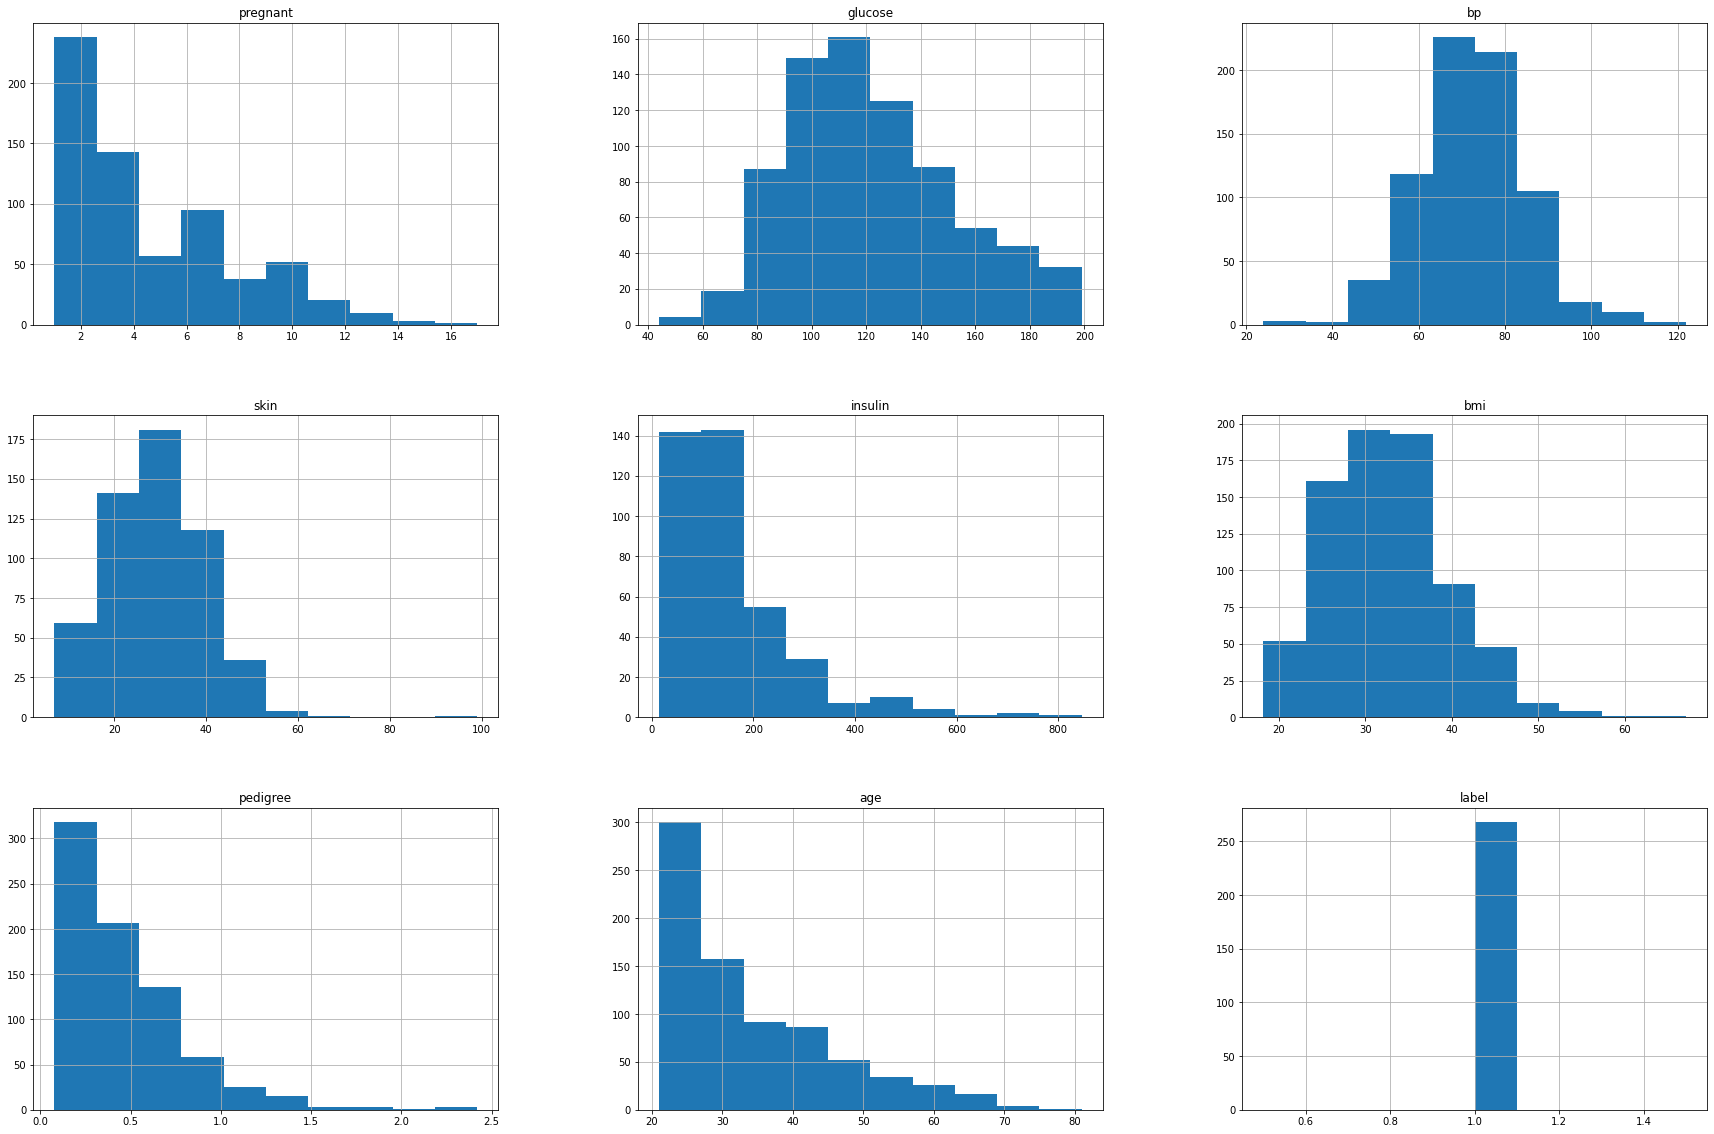

In [59]:
df.hist(figsize=(30,20))

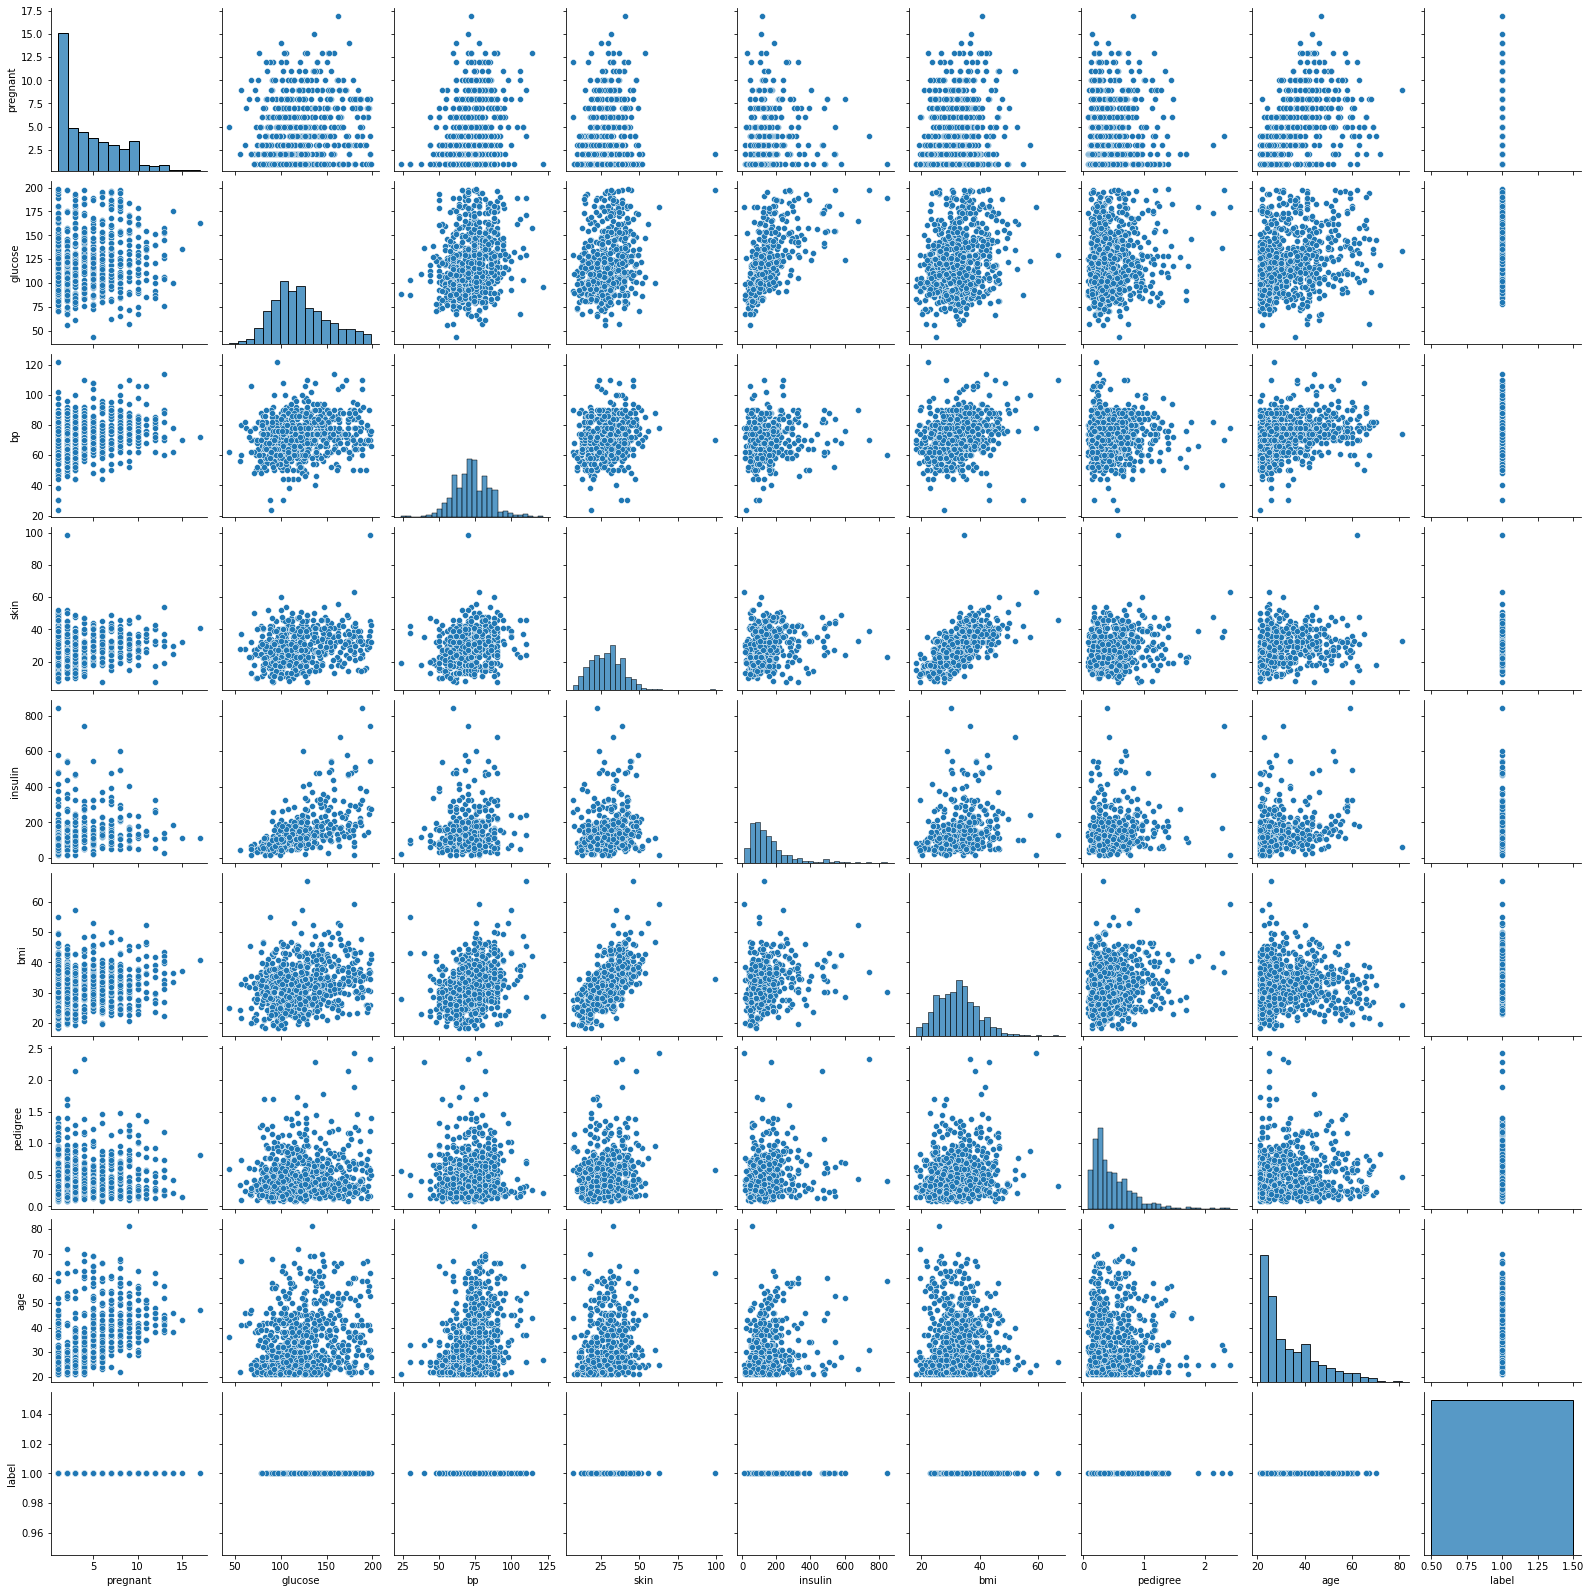

In [60]:
sns.pairplot(df)

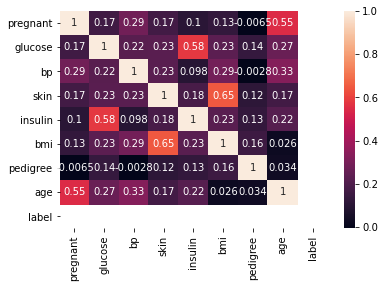

In [61]:
sns.heatmap(df.corr(),annot=True)
plt.show()

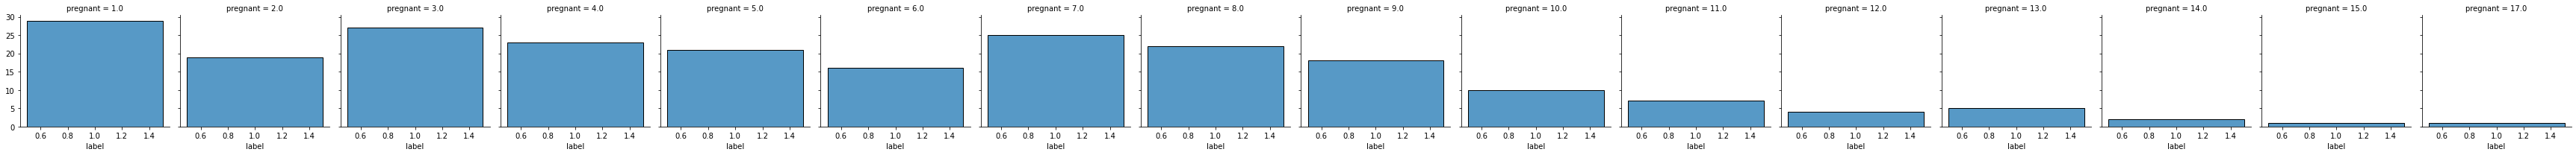

In [62]:
g = sns.FacetGrid(df, col="pregnant")
g.map(sns.histplot, "label")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

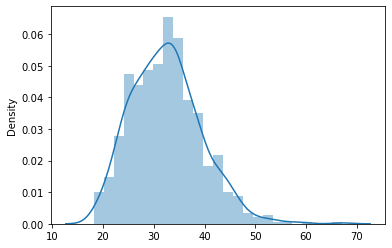

In [63]:
sns.distplot(df[['bmi']])

In [64]:
from sklearn.model_selection import train_test_split

In [80]:
X=df[['pregnant', 'insulin', 'bmi', 'age']]
y=df[['label']]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size = 0.8)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47,train_size = 0.8)

#Importing the Decision tree classifier from the sklearn library.
#from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')

#Training the decision tree classifier. 
clf.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)
lr.predict(X_test)
print('Accuracy Score on test data: ',metrics.accuracy_score(y_test, y_pred))

Accuracy Score on test data:  0.6558441558441559


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



pima = pd.read_csv('Dataset_spine.csv')

pima.head()

# define X and y


# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima.drop('label')
print(X)
# y is a vector, hence we use dot to access 'label'
y = pima.label
print(y)
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47,train_size = 0.8)

#Importing the Decision tree classifier from the sklearn library.
#from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')

#Training the decision tree classifier. 
clf.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

# calculate accuracy
#from sklearn import metrics
print('Accuracy Score on test data: ',metrics.accuracy_score(y_test, y_pred))

# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print('Accuracy Score on confusion_matrix: ' ,metrics.accuracy_score(y_test, y_pred))


classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print('Error Score on confusion_matrix: ' ,1 - metrics.accuracy_score(y_test, y_pred))

sensitivity = TP / float(FN + TP)
print(sensitivity)
print('sensitivity Score on confusion_matrix: ',metrics.recall_score(y_test, y_pred))

specificity = TN / (TN + FP)
print(specificity)
print('specificity Score on confusion_matrix: ', specificity)

precision = TP / float(TP + FP)
print(precision)
print('precision Score on confusion_matrix: ',metrics.precision_score(y_test, y_pred))


KeyError: "['label'] not found in axis"

In [8]:
print('Accuracy Score on test data: ',metrics.accuracy_score(y_test, y_pred))

Accuracy Score on test data:  0.6688311688311688


In [9]:
#accuracy code
import array as arr
y_test1=arr.array('i',y_test)
a=0
w=0
for i in range (len(y_test1)):
    if(y_test1[i]==y_pred[i]):
        a+=1
    else:
        w+=1
acc=a/(a+w)
acc
        

0.6688311688311688

In [10]:
print(metrics.confusion_matrix(y_test, y_pred))

[[71 28]
 [23 32]]


In [11]:
tp=0
tn=0
fp=0
fn=0
for i in range(len(y_test1)):
    if(y_test1[i]==1 and y_pred[i]==1):
        tp=tp+1
    if(y_test1[i]==0 and y_pred[i]==1):
        fp=fp+1
    if(y_test1[i]==1 and y_pred[i]==0):
        fn=fn+1
    if(y_test1[i]==0 and y_pred[i]==0):
        tn=tn+1
mat=[[tn,fp],[fn,tp]]
mat

[[71, 28], [23, 32]]

In [12]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[71 28]
 [23 32]]


In [13]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [14]:
print((TP + TN) / float(TP + TN + FP + FN))
print('Accuracy Score on confusion_matrix: ' ,metrics.accuracy_score(y_test, y_pred))

0.6688311688311688
Accuracy Score on confusion_matrix:  0.6688311688311688


In [15]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print('Error Score on confusion_matrix: ' ,1 - metrics.accuracy_score(y_test, y_pred))

0.33116883116883117
Error Score on confusion_matrix:  0.3311688311688312


In [16]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print('sensitivity Score on confusion_matrix: ',metrics.recall_score(y_test, y_pred))

specificity = TN / (TN + FP)
print(specificity)
print('specificity Score on confusion_matrix: ', specificity)

precision = TP / float(TP + FP)
print(precision)
print('precision Score on confusion_matrix: ',metrics.precision_score(y_test, y_pred))


0.5818181818181818
sensitivity Score on confusion_matrix:  0.5818181818181818
0.7171717171717171
specificity Score on confusion_matrix:  0.7171717171717171
0.5333333333333333
precision Score on confusion_matrix:  0.5333333333333333


In [17]:
f1=2*precision*sensitivity/float(precision+sensitivity)

In [18]:
f1

0.5565217391304348

In [19]:
metrics.f1_score(y_test, y_pred)

0.5565217391304348

In [26]:
??metrics

In [27]:
metrics.roc_curve(y_test, y_pred)

(array([0.        , 0.28282828, 1.        ]),
 array([0.        , 0.58181818, 1.        ]),
 array([2, 1, 0], dtype=int64))